<a href="https://colab.research.google.com/github/AbhinavJangra29/Abhinav-Jangra/blob/main/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [3]:
!unzip /content/arch.zip -d/content

Archive:  /content/arch.zip
  inflating: /content/ner_datasetreference.csv  


In [4]:
import pandas as pd

In [6]:
df=pd.read_csv('/content/ner_datasetreference.csv',encoding='latin1')

In [8]:
df.head(10)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
5,NaN,through,IN,O
6,NaN,London,NNP,B-geo
7,NaN,to,TO,O
8,NaN,protest,VB,O
9,NaN,the,DT,O


In [9]:
df.tail(10)

,Sentence #,Word,POS,Tag
1048565,NaN,impact,NN,O
1048566,NaN,.,.,O
1048567,Sentence: 47959,Indian,JJ,B-gpe
1048568,NaN,forces,NNS,O
1048569,NaN,said,VBD,O
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O
1048574,NaN,attack,NN,O


In [10]:
df.isnull().sum()

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

filling the null values by copying


In [11]:
df=df.fillna(method='ffill')#ffill fills the missing values with the last non null value it sees
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [12]:
df.isnull().sum()


Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

In [13]:
df['Tag'].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

In [15]:
#lets check vocab size
unique_words=df['Word'].nunique()
unique_words

35178

In [58]:
unique_tags=df['Tag'].nunique()
unique_tags

17

In [16]:
words=list(set(df['Word']))#set stores unique values, list of unique words

In [ ]:
words

In [18]:
len(words)

35178

In [19]:
tags=list(set(df['Tag']))
tags

['B-art',
 'O',
 'B-tim',
 'I-art',
 'I-geo',
 'I-eve',
 'I-nat',
 'B-per',
 'B-gpe',
 'I-org',
 'B-nat',
 'I-tim',
 'B-eve',
 'I-per',
 'B-geo',
 'I-gpe',
 'B-org']

In [21]:
df.head()
#now our interest is to make the sentence tuple for each word like (thousand,nns,o),(of,IN,) like this
#for this we make a function that accepts df and do the required thing

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [22]:
class GetSentence(object):
    def __init__(self, data):
        self.n_sentence=1
        self.data=data
        self.empty = False
        function=lambda d:[(w, p, t) for w, p, t in zip(d["Word"].values.tolist(),
                                                        d["POS"].values.tolist(),
                                                        d["Tag"].values.tolist())]

        self.group_sent = self.data.groupby("Sentence #").apply(function)
        self.all_sentences = [d for d in self.group_sent]

In [26]:
get=GetSentence(df)
sentences=get.all_sentences

In [39]:
sentences[0:2]

[[('Thousands', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('demonstrators', 'NNS', 'O'),
  ('have', 'VBP', 'O'),
  ('marched', 'VBN', 'O'),
  ('through', 'IN', 'O'),
  ('London', 'NNP', 'B-geo'),
  ('to', 'TO', 'O'),
  ('protest', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('war', 'NN', 'O'),
  ('in', 'IN', 'O'),
  ('Iraq', 'NNP', 'B-geo'),
  ('and', 'CC', 'O'),
  ('demand', 'VB', 'O'),
  ('the', 'DT', 'O'),
  ('withdrawal', 'NN', 'O'),
  ('of', 'IN', 'O'),
  ('British', 'JJ', 'B-gpe'),
  ('troops', 'NNS', 'O'),
  ('from', 'IN', 'O'),
  ('that', 'DT', 'O'),
  ('country', 'NN', 'O'),
  ('.', '.', 'O')],
 [('Iranian', 'JJ', 'B-gpe'),
  ('officials', 'NNS', 'O'),
  ('say', 'VBP', 'O'),
  ('they', 'PRP', 'O'),
  ('expect', 'VBP', 'O'),
  ('to', 'TO', 'O'),
  ('get', 'VB', 'O'),
  ('access', 'NN', 'O'),
  ('to', 'TO', 'O'),
  ('sealed', 'JJ', 'O'),
  ('sensitive', 'JJ', 'O'),
  ('parts', 'NNS', 'O'),
  ('of', 'IN', 'O'),
  ('the', 'DT', 'O'),
  ('plant', 'NN', 'O'),
  ('Wednesday', 'NNP', 'B-tim'),
  ('

In [28]:
sentences[6]

[('He', 'PRP', 'O'),
 ('said', 'VBD', 'O'),
 ('last', 'JJ', 'O'),
 ('week', 'NN', 'O'),
 ("'s", 'POS', 'O'),
 ('tsunami', 'NN', 'O'),
 ('and', 'CC', 'O'),
 ('the', 'DT', 'O'),
 ('massive', 'JJ', 'O'),
 ('underwater', 'NN', 'O'),
 ('earthquake', 'NN', 'O'),
 ('that', 'WDT', 'O'),
 ('triggered', 'VBD', 'O'),
 ('it', 'PRP', 'O'),
 ('has', 'VBZ', 'O'),
 ('affected', 'VBN', 'O'),
 ('millions', 'NNS', 'O'),
 ('in', 'IN', 'O'),
 ('Asia', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('Africa', 'NNP', 'B-geo'),
 ('.', '.', 'O')]

In [31]:
len(sentences)#a sentence in our case is a list of tuples

47959

48k sentences

In [30]:
#for inputting to a rnn we should know max lenght of a sentence cus we need to pad
maxl = max([len(s) for s in sentences])
print (maxl)

104


In [32]:
#now we make 2 dictionaries
w_index={w:i for i,w in enumerate(words)}
t_index={t:j for j,t in enumerate(tags)}

In [33]:
w_index,t_index

({'Petrechemical': 0,
  'Seine-Saint-Denis': 1,
  '4,200': 2,
  'peanuts': 3,
  'limited-overs': 4,
  'Terror': 5,
  'glucose': 6,
  'Ivanov': 7,
  'publishes': 8,
  'news-agency': 9,
  'illegals': 10,
  'theorized': 11,
  'Merrill': 12,
  'stranded': 13,
  'distract': 14,
  'vaccinating': 15,
  'demobilized': 16,
  'souls': 17,
  'wildly': 18,
  'diversify': 19,
  'brewing': 20,
  'Childhood': 21,
  'legislator': 22,
  'retirees': 23,
  'Boeing': 24,
  'issuing': 25,
  'session': 26,
  'Bechuanaland': 27,
  '1864': 28,
  'trends': 29,
  '737-800': 30,
  'Deposed': 31,
  'secured': 32,
  'Salehi': 33,
  'lies': 34,
  'boosting': 35,
  'Pork': 36,
  'humiliating': 37,
  'Moghaddasi': 38,
  'near-by': 39,
  'supermarket': 40,
  'blueprint': 41,
  'Kuba': 42,
  'masterminds': 43,
  'Sakineh': 44,
  'Kohli': 45,
  'crusader': 46,
  'Courts': 47,
  'Evangelina': 48,
  'four-person': 49,
  'Andre': 50,
  'Ayoub': 51,
  '22-nation': 52,
  'spread': 53,
  'neo-liberal': 54,
  'refill': 55,
  '

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [38]:
#first line made a matrix of indices of each corresponding word
X=[[w_index[w[0]]for w in s]for s in sentences]
X=pad_sequences(maxlen=maxl,padding='post',sequences=X)

In [77]:
X.shape

(47959, 104)

In [76]:
X[0:2]

array([[34197,  1282, 25626, 13599,  6680, 24906,  2512, 10008,  8546,
        13431,  8583,  9745, 23677, 32582, 32918, 13431, 16906,  1282,
        33510,  7479, 32464, 28633,  8279,  4422,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [21894, 25059, 23019, 21099,  7753, 10008, 17733, 29310, 10008,
        30784,  1682,  8916,  1282, 13431, 30165, 25074, 17752,  9812,
        19714, 11863, 29276,  128

In [45]:
w_index['Thousands']#see the above matrix and first element index of 'Thousands', we have applied padding also

34197

In [46]:
#we make a similar matrix for tags
Y=[[t_index[w[2]]for w in s]for s in sentences]
Y=pad_sequences(maxlen=maxl,padding='post',sequences=Y)

In [47]:
Y[0]

array([ 1,  1,  1,  1,  1,  1, 14,  1,  1,  1,  1,  1, 14,  1,  1,  1,  1,
        1,  8,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0], dtype=int32)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [50]:
import keras.utils

In [51]:
y_train = keras.utils.to_categorical(y_train)

In [52]:
print(x_train.shape, y_train.shape)#extra dimension 17 after one hot encoding in to_categorical

(38367, 104) (38367, 104, 17)


In [53]:
print(x_test.shape, y_test.shape)

(9592, 104) (9592, 104)


In [54]:
y_test = keras.utils.to_categorical(y_test)

In [55]:
x_train[0]

array([ 1846,   998, 29294, 31494, 32753,  2038, 14618,  8021, 15566,
       15305,  4570, 31837, 19627,  6693, 17752, 22389, 10008, 20835,
        6087,  1520, 15911,  4422,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [56]:
#i am using a bidirectional lstm
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [63]:
input=Input(shape=(104))
#maps ech word to a 104 length dense vector
model=Embedding(input_dim=unique_words,output_dim=104,input_length=140)(input)
model=SpatialDropout1D(0.1)(model)
model=Bidirectional(LSTM(units=150,return_sequences=True, recurrent_dropout=0.1))(model)
output = TimeDistributed(Dense(unique_tags, activation="softmax"))(model)#each time step

In [64]:
#combining input and output layers

In [65]:
model=Model(input,output)

In [66]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 104)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 104, 104)          3658512   
                                                                 
 spatial_dropout1d_2 (Spati  (None, 104, 104)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_2 (Bidirecti  (None, 104, 300)          306000    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 104, 17)           5117      
 stributed)                                                      
                                                           

In [67]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [68]:
pip install livelossplot

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

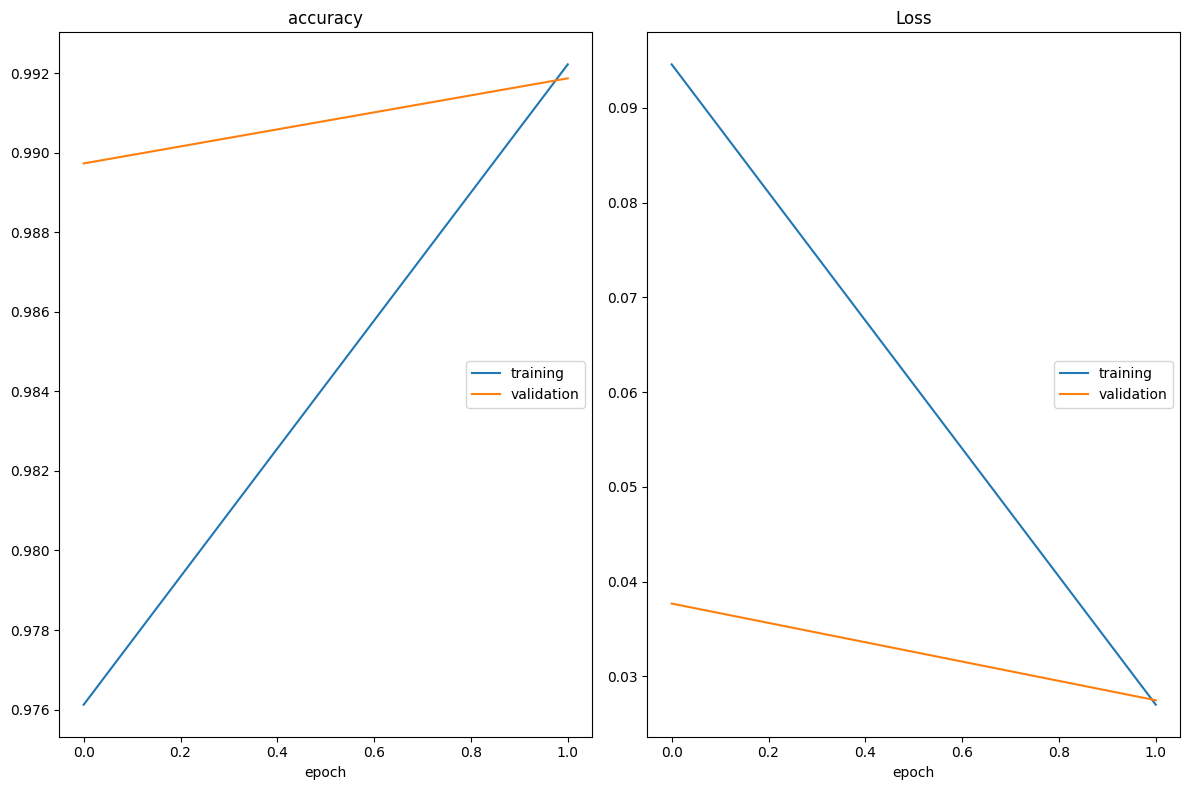

accuracy
	training         	 (min:    0.976, max:    0.992, cur:    0.992)
	validation       	 (min:    0.990, max:    0.992, cur:    0.992)
Loss
	training         	 (min:    0.027, max:    0.095, cur:    0.027)
	validation       	 (min:    0.027, max:    0.038, cur:    0.027)
960/960 [==============================] - 744s 776ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0275 - val_accuracy: 0.9919


In [71]:
early_stop= EarlyStopping(monitor='val_accuracy',patience=1,verbose=0,mode='max',restore_best_weights=False)
callbacks=[PlotLossesCallback(),early_stop]

history=model.fit(x_train,np.array(y_train),validation_split=0.2,batch_size=32,epochs=2,verbose=1,callbacks=callbacks)

In [72]:
model.evaluate(x_test,np.array(y_test))

300/300 [==============================] - 35s 117ms/step - loss: 0.0272 - accuracy: 0.9920


[0.027160443365573883, 0.9919885396957397]

In [74]:
i = np.random.randint(0,x_test.shape[0])
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)

y_true=np.argmax(np.array(y_test),axis=-1)[i]
print("{:15} ({:5}): {}".format("Word", "True", "Predicted by our Model"))

print("--"*20)

for w,true,pred in zip(x_test[i],y_true,p[0]):
    print("{:15}{}\t {}".format(words[w-1],tags[true],tags[pred]))

1/1 [==============================] - 0s 98ms/step
Word            (True ): Predicted by our Model
----------------------------------------
mayors         O	 O
sub-Antarctic  O	 O
assemble       B-tim	 B-tim
destitute      O	 O
Puma           B-per	 B-per
outsourcing    I-per	 O
fanatics       B-org	 I-per
Technical      I-org	 I-per
35-40          I-org	 I-per
Admiral        O	 O
showing        B-geo	 B-org
Feb.           O	 O
Lithuanian     O	 O
Noumea         O	 O
then           O	 O
laments        O	 O
aneurysm       O	 O
flexibility    O	 O
mid-1980s      O	 O
laments        O	 O
her            O	 O
disarmament    O	 O
tested         O	 O
Discussions    B-org	 B-org
Possible       O	 O
sixth-seed     O	 O
destitute      O	 O
Quoting        O	 O
Grant          O	 O
far-fetched    O	 O
laments        O	 O
ill-wishers    O	 O
Radovan        O	 O
carriages      B-tim	 B-tim
Bucharest      O	 O
Poland         B-art	 B-art
Poland         B-art	 B-art
Poland         B-art	 B-art
Poland 

In [75]:
model.save_weights('final_model.h5')